# Planecrash Database
http://www.planecrashinfo.com/database.htm

## Get the Data

In [51]:
project_path = r"d:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project"

In [52]:
%cd $project_path

d:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project


In [53]:
!dir

 Volume in drive D is Documents
 Volume Serial Number is 8DBE-F730

 Directory of d:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project

15.12.2019  09:16    <DIR>          .
15.12.2019  09:16    <DIR>          ..
15.12.2019  09:16    <DIR>          data
               0 File(s)              0 bytes
               3 Dir(s)  39,309,815,808 bytes free


In [54]:
!dir data

 Volume in drive D is Documents
 Volume Serial Number is 8DBE-F730

 Directory of d:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project\data

15.12.2019  09:16    <DIR>          .
15.12.2019  09:16    <DIR>          ..
12.10.2019  18:34         2,229,765 plane-crash.csv
19.09.2019  23:33       100,900,789 seattle-crime.csv
18.10.2019  04:15         2,381,890 seattle-house-sales-prices.csv
               3 File(s)    105,512,444 bytes
               2 Dir(s)  39,309,815,808 bytes free


In [55]:
import pandas as pd
import numpy as np

In [56]:
# Define date parser to convert date records into pandas format:
date_parser = lambda d: pd.datetime.strptime(d, '%B %d, %Y')

In [57]:
# Read the file and show first 3 records:
raw_df = pd.read_csv('data\plane-crash.csv', delimiter=',', na_values='?', parse_dates=['date'], date_parser=date_parser)
raw_df.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


In [58]:
# Show last 3 records:
raw_df.tail(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
5780,2018-09-28,1010,"Chuuk, Micronesia",Air Niugini,NaN,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...
5781,2018-10-29,0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ..."
5782,2018-11-06,0253,"Georgetown, Guyana",Fly Jamaica Airways,NaN,Georgetown - Toronto,Boeing 757-N23,N524AT,30233/895,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ..."


In [59]:
raw_df.shape

(5783, 13)

In [60]:
# Show general information about the dataframe:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null datetime64[ns]
time            3675 non-null object
location        5777 non-null object
operator        5762 non-null object
flight_no       1347 non-null object
route           4289 non-null object
ac_type         5759 non-null object
registration    5431 non-null object
cn_ln           4576 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5731 non-null float64
summary         5552 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 587.4+ KB


In [61]:
# Make a copy of the dataframe for proccessing (the raw dataframe isn't large, make the full copy)
df = raw_df.copy()

# Drop unimportant features:
df.drop(columns=['registration','cn_ln', 'flight_no'], inplace=True)
df.head(3)

,date,time,location,operator,route,ac_type,aboard,fatalities,ground,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


## Parse time info

In [62]:
import datetime as dt
import re

In [63]:
df.time

0         17:18
1           NaN
2         06:30
3           NaN
4       c 18:30
5       c 10:30
6       c 01:00
7       c 15:20
8           NaN
9       c 01:00
10      c 23:45
11          NaN
12      c 23:45
13          NaN
14          NaN
15      c 05:15
16      c 08:45
17          NaN
18      c 07:00
19      c 07:45
20      c 21:30
21          NaN
22      c 10:00
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
5753       1120
5754       0815
5755       0653
5756       1530
5757       1402
5758       1335
5759       1015
5760       1600
5761       0830
5762       0800
5763       1815
5764       1216
5765        NaN
5766       1731
5767       1431
5768       0926
5769       1451
5770       1908
5771      14:15
5772       1120
5773       0800
5774       1004
5775       1130
5776       1208
5777       1700
5778       0744
5779       1655
5780       1010
5781       0631
5782       0253
Name: time, Length: 5783

In [64]:
def parse_time(t):
    try:
        result = re.search(pattern=r"(\d{2}):?(\d{2})", string=t).groups()
        return dt.time(int(result[0]), int(result[1]))
    except (AttributeError, TypeError):
        return np.nan

In [65]:
df['time'] = raw_df.time.apply(parse_time)
df.head(3)

,date,time,location,operator,route,ac_type,aboard,fatalities,ground,summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


## Parse Route info

In [66]:
print(f"Total number of records:\t{df.shape[0]:,.0f}")
print(f"Records with 'Route' info:\t{df.route.notna().sum():,.0f}")

Total number of records:	5,783
Records with 'Route' info:	4,289


In [67]:
pattern = r"(?P<from>[\w\s]+)\s?[-–]+s?(?P<to>[\w\s]+)"

In [68]:
df[['from','to']] = raw_df.route.str.extract(pattern, expand=True)
df.tail(3)

,date,time,location,operator,route,ac_type,aboard,fatalities,ground,summary,from,to
5780,2018-09-28,10:10:00,"Chuuk, Micronesia",Air Niugini,Pohnpei - Chuuk,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...,Pohnpei,Chuuk
5781,2018-10-29,06:31:00,"Off Jakarta, Indonesia",Lion Air,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ...",Jakarta,Pangkal Pinang
5782,2018-11-06,02:53:00,"Georgetown, Guyana",Fly Jamaica Airways,Georgetown - Toronto,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ...",Georgetown,Toronto


In [69]:
# "pd.Series.str.extract" method doesn't strip leading and ending spaces:
df.to.str.startswith(' ').sum()

3966

In [70]:
# Strip each column:
df.loc[:, 'from'] = df['from'].str.strip()
df.loc[:, 'to'] = df['to'].str.strip()

In [71]:
print(f"Accindents with 'From' info:\t{df['from'].notna().sum():,.0f}")
print(f"Accindents with 'To' info:\t{df['to'].notna().sum():,.0f}")

Accindents with 'From' info:	4,029
Accindents with 'To' info:	4,029


In [72]:
df.route[df.to.isna()].value_counts().head(10)

Training           95
Sightseeing        42
Test flight        20
Test                7
Otis AFB            3
Skydiving           3
Demonstration       3
Parachuting         3
Positioning         3
Training flight     2
Name: route, dtype: int64

There are 260 records that weren't parsed, but most of them don't contain any valueable info, so now we can drop this feature

In [73]:
df.drop(columns=['route'], inplace=True)
df.tail(3)

,date,time,location,operator,ac_type,aboard,fatalities,ground,summary,from,to
5780,2018-09-28,10:10:00,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...,Pohnpei,Chuuk
5781,2018-10-29,06:31:00,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ...",Jakarta,Pangkal Pinang
5782,2018-11-06,02:53:00,"Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ...",Georgetown,Toronto


## Extract info about people aboard and victims

In [74]:
pattern = r"(?:passengers):(?P<passengers>\d+)\s*(?:crew):(?P<crew>\d+)"

In [75]:
# Extract data about people aboard and fatalities:
df[['fatalities_p', 'fatalities_c']] = df.fatalities.str.extract(pat = pattern)
df[['aboard_p', 'aboard_c']] = df.aboard.str.extract(pat = pattern)

# Rename 'ground' column to make it more clear:
df.rename(columns={'ground':'fatalities_g'}, inplace=True)
df.head(3)

,date,time,location,operator,ac_type,aboard,fatalities,fatalities_g,summary,from,to,fatalities_p,fatalities_c,aboard_p,aboard_c
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly...",NaN,NaN,1,0,1,1
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...,NaN,NaN,0,0,0,1
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...,NaN,NaN,0,5,0,5


In [76]:
# Reorder columns:
df.rename(columns={'location': 'crash_location'}, inplace=True)
df = df[['date','time','from','to','crash_location','operator','ac_type','aboard','fatalities','summary',
         'aboard_c','aboard_p','fatalities_c','fatalities_p','fatalities_g']]

df.tail(3)

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g
5780,2018-09-28,10:10:00,Pohnpei,Chuuk,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),The aircraft was approaching for a landing at ...,12,35,0,1,0.0
5781,2018-10-29,06:31:00,Jakarta,Pangkal Pinang,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),"The airliner crashed into the Jakarta Sea, 13 ...",8,181,8,181,0.0
5782,2018-11-06,02:53:00,Georgetown,Toronto,"Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),"After taking off and reaching FL200, the crew ...",8,120,0,1,0.0


In [77]:
print(list(enumerate(df.columns)))

[(0, 'date'), (1, 'time'), (2, 'from'), (3, 'to'), (4, 'crash_location'), (5, 'operator'), (6, 'ac_type'), (7, 'aboard'), (8, 'fatalities'), (9, 'summary'), (10, 'aboard_c'), (11, 'aboard_p'), (12, 'fatalities_c'), (13, 'fatalities_p'), (14, 'fatalities_g')]


In [78]:
# Convert numerical features to float format:
df.iloc[:, 10:] = df.iloc[:, 10:].astype('float')
df.tail(3)

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g
5780,2018-09-28,10:10:00,Pohnpei,Chuuk,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),The aircraft was approaching for a landing at ...,12.0,35.0,0.0,1.0,0.0
5781,2018-10-29,06:31:00,Jakarta,Pangkal Pinang,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),"The airliner crashed into the Jakarta Sea, 13 ...",8.0,181.0,8.0,181.0,0.0
5782,2018-11-06,02:53:00,Georgetown,Toronto,"Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),"After taking off and reaching FL200, the crew ...",8.0,120.0,0.0,1.0,0.0


## Feature engineering

In [79]:
# Check that there is no records where passangeres fatalities are higher than number of passangers aboard:
df[df.aboard_p < df.fatalities_p]

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g


In [80]:
# Check that there is no records where crew fatalities are higher than the crew aboard:
df[df.aboard_c < df.fatalities_c]

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g
5716,2015-09-05,19:08:00,Ouagadougou,Dakar,"Off Dakar, Near Dioubel, Senegal",Senegalair,Hawker Siddeley HS-125,7 (passengers:5 crew:2),7 (passengers:2 crew:5),The air ambulance went missing while on a medi...,2.0,5.0,5.0,2.0,0.0


In [81]:
# Swap the values:
df.loc[5716, ['fatalities_c', 'fatalities_p']] = df.loc[5716, ['fatalities_p', 'fatalities_c']].values

# Check results:
df[df.aboard_c < df.fatalities_c]

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g


In [82]:
# # Add total fatalities (with and without fatalities on the ground):
# df['fatalities_t'] = df['fatalities_c'] + df['fatalities_p']
# df['fatalities_t'] = df['fatalities_c'] + df['fatalities_p']+ df['fatalities_g']

# Add death rates:
df['deathrate_p'] = df.fatalities_p / df.aboard_p
df['deathrate_c'] = df.fatalities_c / df.aboard_c

# Show results:
df.tail(3)

,date,time,from,to,crash_location,operator,ac_type,aboard,fatalities,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g,deathrate_p,deathrate_c
5780,2018-09-28,10:10:00,Pohnpei,Chuuk,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),The aircraft was approaching for a landing at ...,12.0,35.0,0.0,1.0,0.0,0.028571,0.0
5781,2018-10-29,06:31:00,Jakarta,Pangkal Pinang,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),"The airliner crashed into the Jakarta Sea, 13 ...",8.0,181.0,8.0,181.0,0.0,1.000000,1.0
5782,2018-11-06,02:53:00,Georgetown,Toronto,"Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),"After taking off and reaching FL200, the crew ...",8.0,120.0,0.0,1.0,0.0,0.008333,0.0


In [83]:
# Print general info and base statistics:
print(df.info(), '\n')
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 17 columns):
date              5783 non-null datetime64[ns]
time              3650 non-null object
from              4029 non-null object
to                4029 non-null object
crash_location    5777 non-null object
operator          5762 non-null object
ac_type           5759 non-null object
aboard            5783 non-null object
fatalities        5783 non-null object
summary           5552 non-null object
aboard_c          5239 non-null float64
aboard_p          5239 non-null float64
fatalities_c      5222 non-null float64
fatalities_p      5222 non-null float64
fatalities_g      5731 non-null float64
deathrate_p       4235 non-null float64
deathrate_c       5209 non-null float64
dtypes: datetime64[ns](1), float64(7), object(9)
memory usage: 768.1+ KB
None 



,count,mean,std,min,25%,50%,75%,max
aboard_c,5239.0,4.137240,3.463559,0.0,2.000000,3.0,5.0,61.0
aboard_p,5239.0,23.959725,42.256541,0.0,2.000000,9.0,26.0,614.0
fatalities_c,5222.0,3.346610,3.126848,0.0,1.000000,3.0,4.0,46.0
fatalities_p,5222.0,16.952509,32.629663,0.0,1.000000,5.0,18.0,560.0
fatalities_g,5731.0,1.526610,51.666765,0.0,0.000000,0.0,0.0,2750.0
deathrate_p,4235.0,0.804676,0.332262,0.0,0.727273,1.0,1.0,1.0
deathrate_c,5209.0,0.848400,0.311399,0.0,1.000000,1.0,1.0,1.0


# EDA

In [84]:
import matplotlib.pyplot as plt

In [85]:
def without_nan(data):
    indexes = data.notna()
    if len(indexes.shape) == 1:
        return data[indexes]
    else:
        return data[indexes.all(axis=1)]

In [103]:
def plot_hboxplot(data, labels='', log=True, xscale=(0.001, 1.1), precision=3):
    data = without_nan(data).T

    plt.figure(figsize=(16,6))
    plt.boxplot(data, vert=False, labels=labels)
    if log:
        plt.xscale('log')
        x_ticks = np.logspace(np.floor(np.log10(xscale[0])), np.ceil(np.log10(xscale[1])),21)
        plt.xticks(ticks=x_ticks, labels=x_ticks.round(precision))
    
    plt.xlim(xscale)
    plt.xticks(rotation=30)
    plt.yticks(rotation=90, va='center')
    plt.show()

#### How many people died in aircrashes?

In [98]:
df.iloc[:,12:-2].sum()

fatalities_c    17476.0
fatalities_p    88526.0
fatalities_g     8749.0
dtype: float64

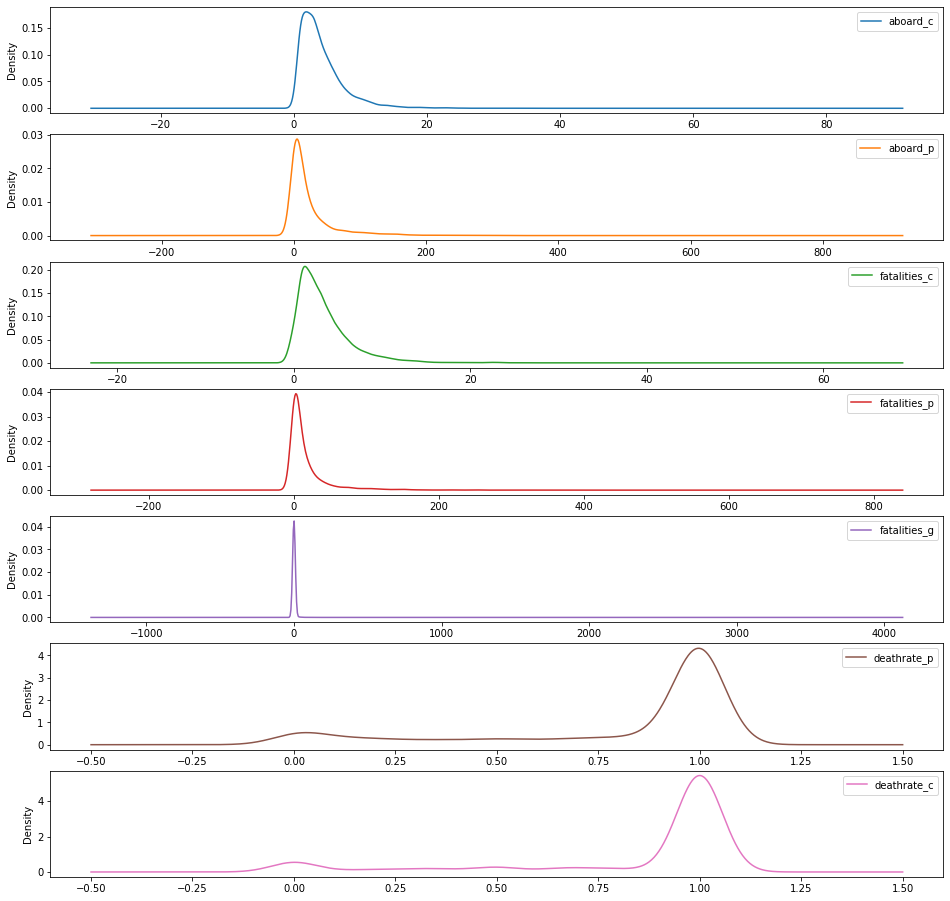

In [102]:
df.iloc[:,10:].plot(kind='kde', subplots=True, sharex=False, figsize=(16,16))
plt.show()

#### Plot the deathrate distribution

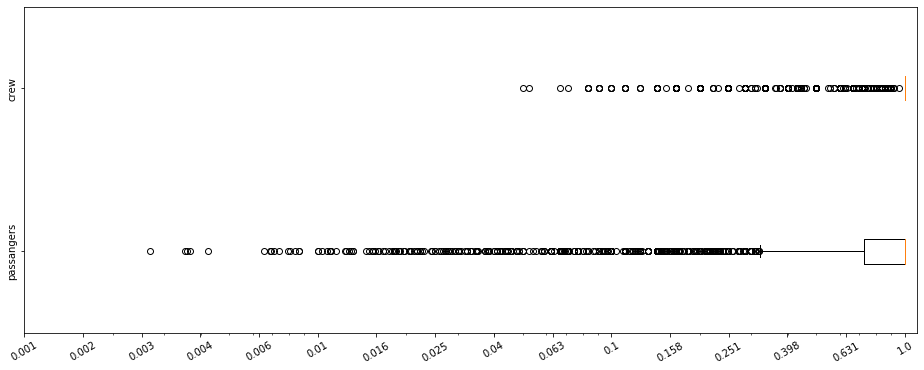

In [87]:
plot_hboxplot(df[['deathrate_p', 'deathrate_c']], labels=['passangers','crew'])

#### Plot fatalities distributions

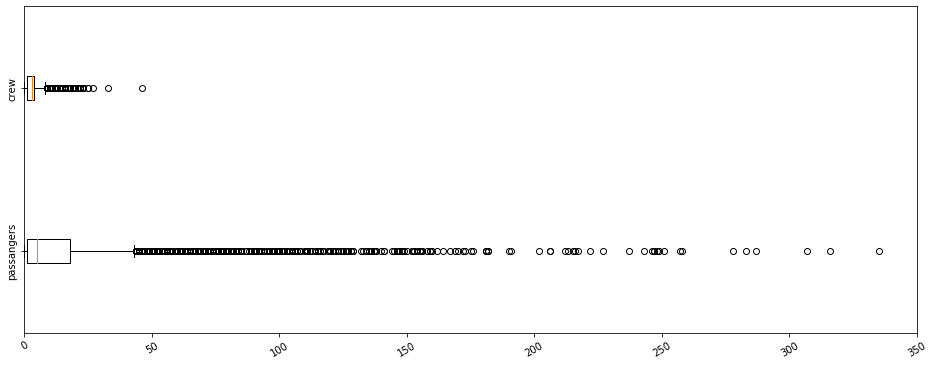

In [88]:
plot_hboxplot(df[['fatalities_p', 'fatalities_c']], labels=['passangers','crew'], log=False, xscale=(0, 350))

#### What is the maximum total fatalities count?

In [ ]:
total_fatalities = (df.fatalities_c + df.fatalities_p + df.fatalities_g)
df.loc[total_fatalities.idxmax(),]

In [93]:
df.loc[total_fatalities.idxmax(), 'summary']

'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.'

#### What is the maximum total fatalities count without ground losses?

In [94]:
df.loc[(df.fatalities_c + df.fatalities_p).idxmax(),]

date                                            1977-03-27 00:00:00
time                                                       17:07:00
from                                                       Tenerife
to                                                       Las Palmas
crash_location                             Tenerife, Canary Islands
operator                           Pan American World Airways / KLM
ac_type                        Boeing B-747-121 / Boeing B-747-206B
aboard                              644   (passengers:614  crew:30)
fatalities                          583   (passengers:560  crew:23)
summary           Both aircraft were diverted to Tenerife becaus...
aboard_c                                                         30
aboard_p                                                        614
fatalities_c                                                     23
fatalities_p                                                    560
fatalities_g                                    

In [95]:
df.loc[(df.fatalities_c + df.fatalities_p).idxmax(), 'summary']

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft was named Clipper 

#### What operators have killed most people?

In [43]:
top_operators_by_fatalities = df.groupby('operator')['fatalities_t'].agg([len, sum])
top_operators_by_fatalities.rename(columns={'len': 'incidents', 'sum': 'total_fatalities'}, inplace=True)
top_operators_by_fatalities.nlargest(10, columns='total_fatalities')

,incidents,total_fatalities
operator,,
Aeroflot,260.0,8459.0
American Airlines,37.0,4311.0
United Air Lines,44.0,3768.0
Military - U.S. Air Force,177.0,3341.0
Air France,72.0,1696.0
Pan American World Airways,41.0,1281.0
Military - U.S. Army Air Forces,43.0,1066.0
AVIANCA,24.0,944.0
Turkish Airlines (THY),14.0,891.0


Explore **Aeroflot** incidents:

In [44]:
aeroflot = df[df.operator == 'Aeroflot']
aeroflot.isna().sum(axis=0)

date               0
time              72
from              49
to                49
crash_location     0
operator           0
ac_type            2
aboard             0
fatalities         0
summary            4
aboard_c          21
aboard_p          21
fatalities_c      22
fatalities_p      22
fatalities_g       5
fatalities_t      25
deathrate_p       38
deathrate_c       22
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(708205.0, 734536.5147213363)

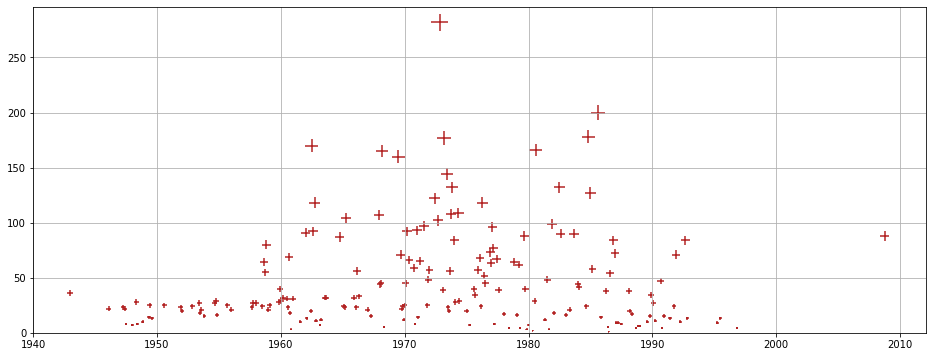

In [45]:
plt.figure(figsize=(16,6))
data = df[df.operator == 'Aeroflot'].resample(rule='M', on='date').sum()
plt.scatter(x=data.index, y=data.fatalities_t, marker='+', s=data.fatalities_t, color='firebrick')
plt.grid()
plt.ylim(0,)
plt.xlim(pd.datetime(1940,1,1))

In [46]:
top_operators_by_fatalities_after_1992 = df[df.date > pd.datetime(1992,1,1)].groupby('operator')['fatalities_t'].agg([len, sum])
top_operators_by_fatalities_after_1992.rename(columns={'len': 'incidents', 'sum': 'total_fatalities'}, inplace=True)
top_operators_by_fatalities_after_1992.nlargest(10, columns='total_fatalities')

,incidents,total_fatalities
operator,,
American Airlines,6.0,3468.0
United Air Lines,3.0,2860.0
China Airlines (Taiwan),4.0,695.0
Malaysia Airlines,3.0,571.0
Military - Russian Air Force,11.0,470.0
Air France,5.0,397.0
Saudi Arabian Airlines / Kazakhstan Airlines,1.0,349.0
TAM (Brazil),4.0,299.0
EgyptAir,3.0,297.0


Select first 4 operators and build the same graph that we built for Aeroflot

In [47]:
operators = top_operators_by_fatalities_after_1992.nlargest(4, columns='total_fatalities').index.tolist()

(727198.0, 737208.5671608567)

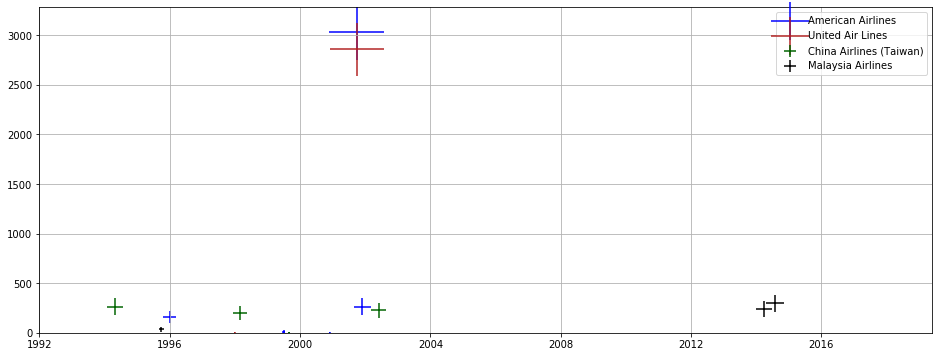

In [50]:
plt.figure(figsize=(16,6))
colors = ['blue','firebrick', 'darkgreen','black']
for i in range(4):
    data = df[df.operator == operators[i]].resample(rule='M', on='date').sum()
    plt.scatter(x=data.index, y=data.fatalities_t, marker='+', s=data.fatalities_t, color=colors[i], label=operators[i])
plt.grid()
plt.legend()
plt.ylim(0,)

plt.xlim(pd.datetime(1992,1,1))

In [47]:
temp = without_nan(df[['date','fatalities_p', 'fatalities_c']])

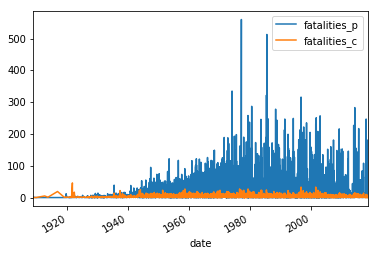

In [42]:
temp.groupby('date').sum().plot()